# Predicting Mushroom Properties: A Data-Driven Regression Study

In this project, we aim to predict the properties of mushrooms using a data-driven approach with regression algorithms, specifically K-Nearest Neighbors (KNN). By leveraging a dataset containing various features such as size, color, texture, and shape, the goal is to accurately predict certain properties of mushrooms based on these characteristics.

The project involves preprocessing and analyzing the dataset to identify patterns and relationships between the features and the target variables. Performance is evaluated using standard regression metrics, including Mean Absolute Error (MAE), Mean Squared Error (MSE), and R² Score, to assess how well the model can predict the target properties.

This study highlights the power of KNN regression for solving classification-like tasks when predicting continuous values based on multiple input features, as well as providing insights into biological factors that may influence mushroom properties.

In [1]:
import pandas as pd # for data manipulation
import numpy as np # for numerical computation
import matplotlib.pyplot as plt # for data visualization
from sklearn.preprocessing import StandardScaler # for preprocessing data
from sklearn.neighbors import KNeighborsRegressor # for modeling KNN
from sklearn.model_selection import train_test_split # for splitting data into train and test
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score # for metrics and evaluation model

In [2]:
df = pd.read_csv(r"D:\data mentah x\mushroom_cleaned.csv") # importing data 

In [3]:
df.head() # read the first 5th data from above

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1


In [4]:
df.tail() # read the first 5th data from below

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
54030,73,5,3,2,0.887740,569,12,0.943195,1
54031,82,2,3,2,1.186164,490,12,0.943195,1
54032,82,5,3,2,0.915593,584,12,0.888450,1
54033,79,2,3,2,1.034963,491,12,0.888450,1
54034,72,5,3,2,1.158311,492,12,0.888450,1


In [5]:
df.info() # showing type of data, non-null count data each columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54035 entries, 0 to 54034
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cap-diameter     54035 non-null  int64  
 1   cap-shape        54035 non-null  int64  
 2   gill-attachment  54035 non-null  int64  
 3   gill-color       54035 non-null  int64  
 4   stem-height      54035 non-null  float64
 5   stem-width       54035 non-null  int64  
 6   stem-color       54035 non-null  int64  
 7   season           54035 non-null  float64
 8   class            54035 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 3.7 MB


In [6]:
df.describe(include = 'all') # showing the descriptive statistics

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
count,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000
mean,567.257204,4.000315,2.142056,7.329509,0.759110,1051.081299,8.418062,0.952163,0.549181
std,359.883763,2.160505,2.228821,3.200266,0.650969,782.056076,3.262078,0.305594,0.497580
min,0.000000,0.000000,0.000000,0.000000,0.000426,0.000000,0.000000,0.027372,0.000000
25%,289.000000,2.000000,0.000000,5.000000,0.270997,421.000000,6.000000,0.888450,0.000000
50%,525.000000,5.000000,1.000000,8.000000,0.593295,923.000000,11.000000,0.943195,1.000000
75%,781.000000,6.000000,4.000000,10.000000,1.054858,1523.000000,11.000000,0.943195,1.000000
max,1891.000000,6.000000,6.000000,11.000000,3.835320,3569.000000,12.000000,1.804273,1.000000


In [7]:
# checking the duplicate value
df.duplicated().sum()

303

There are 303 duplicate data

In [8]:
# delete the duplicate data
df.drop_duplicates(inplace = True)

In [9]:
# checking the null data for each columns
df.isnull().sum()

cap-diameter       0
cap-shape          0
gill-attachment    0
gill-color         0
stem-height        0
stem-width         0
stem-color         0
season             0
class              0
dtype: int64

The result is there's no null data

In [11]:
# choosing the feature and target data
x = df.drop(columns = 'class') # feature data
y = df['class'] # target data

In [12]:
feature_columns = x.columns

Scaling data with Standard Scaler

In [13]:
# make a function for scaling data
def scaler_data(data):
    scaler = StandardScaler()
    data = np.array(data).reshape(-1, 1)
    return scaler.fit_transform(data)

Making a function metrics

In [14]:
# function mean absolute error
def mae(real_data, data_predicted):
    return mean_absolute_error(real_data, data_predicted)

# function mean squared error
def mse(real_data, data_predicted):
    return mean_squared_error(real_data, data_predicted)

# function r2 score
def r2(real_data, data_predicted):
    return r2_score(real_data, data_predicted)

In [15]:
# scaling data
x1 = x.copy()
for i in feature_columns:
    x1[i] = scaler_data(df[i])

In [16]:
x1.head()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season
0,2.229226,-0.926441,-0.063989,0.832305,4.729807,0.625435,0.786897,2.804390
1,2.476186,-0.926441,-0.063989,0.832305,4.729807,0.640815,0.786897,2.804390
2,2.226451,-0.926441,-0.063989,0.832305,4.427986,0.652349,0.786897,2.804390
3,1.921218,0.920991,-0.063989,0.832305,4.699009,0.652349,0.786897,2.804390
4,2.043311,0.920991,-0.063989,0.832305,4.581976,0.521623,0.786897,-0.030044


In [17]:
# splitting data
x_train, x_test, y_train, y_test = train_test_split(x1, y, train_size = .8, test_size = .2, random_state = 42)

In [18]:
# making a model
neighbors_record = []
mae_record = []
mse_record = []
r2_record = []

for i in range(5, 11):
    model = KNeighborsRegressor(n_neighbors = i)
    model.fit(x_train, y_train)
    y_predict = model.predict(x_test)
    
    mae_value = mae(y_test, y_predict)
    mse_value = mse(y_test, y_predict)
    r2_value = r2(y_test, y_predict)
    
    neighbors_record.append(i)
    mae_record.append(mae_value)
    mse_record.append(mse_value)
    r2_record.append(r2_value)
    
    print(f'Mean Absolute Error with {i} neighbors = {mae_value}')
    print(f'Mean Squared Error with {i} neighbors = {mse_value}')
    print(f'R2 Score with {i} neighbors = {r2_value}')
    print('')

Mean Absolute Error with 5 neighbors = 0.016060295896529263
Mean Squared Error with 5 neighbors = 0.009271424583604729
R2 Score with 5 neighbors = 0.9624609781484923

Mean Absolute Error with 6 neighbors = 0.017090040631494056
Mean Squared Error with 6 neighbors = 0.009656441590934938
R2 Score with 6 neighbors = 0.960902084828373

Mean Absolute Error with 7 neighbors = 0.01795850004652461
Mean Squared Error with 7 neighbors = 0.009773966346564678
R2 Score with 7 neighbors = 0.9604262394682674

Mean Absolute Error with 8 neighbors = 0.01876104959523588
Mean Squared Error with 8 neighbors = 0.009995522006141249
R2 Score with 8 neighbors = 0.9595291839326081

Mean Absolute Error with 9 neighbors = 0.019467965220268193
Mean Squared Error with 9 neighbors = 0.010215885685008851
R2 Score with 9 neighbors = 0.958636954601323

Mean Absolute Error with 10 neighbors = 0.020098632176421324
Mean Squared Error with 10 neighbors = 0.010367544431004
R2 Score with 10 neighbors = 0.958022904308561



In [19]:
metrics_df = pd.DataFrame({
    'Neighbors': neighbors_record,
    'MAE': mae_record,
    'MSE': mse_record,
    'R2_Score': r2_record
})


metrics_df

,Neighbors,MAE,MSE,R2_Score
0,5,0.016060,0.009271,0.962461
1,6,0.017090,0.009656,0.960902
2,7,0.017959,0.009774,0.960426
3,8,0.018761,0.009996,0.959529
4,9,0.019468,0.010216,0.958637
5,10,0.020099,0.010368,0.958023


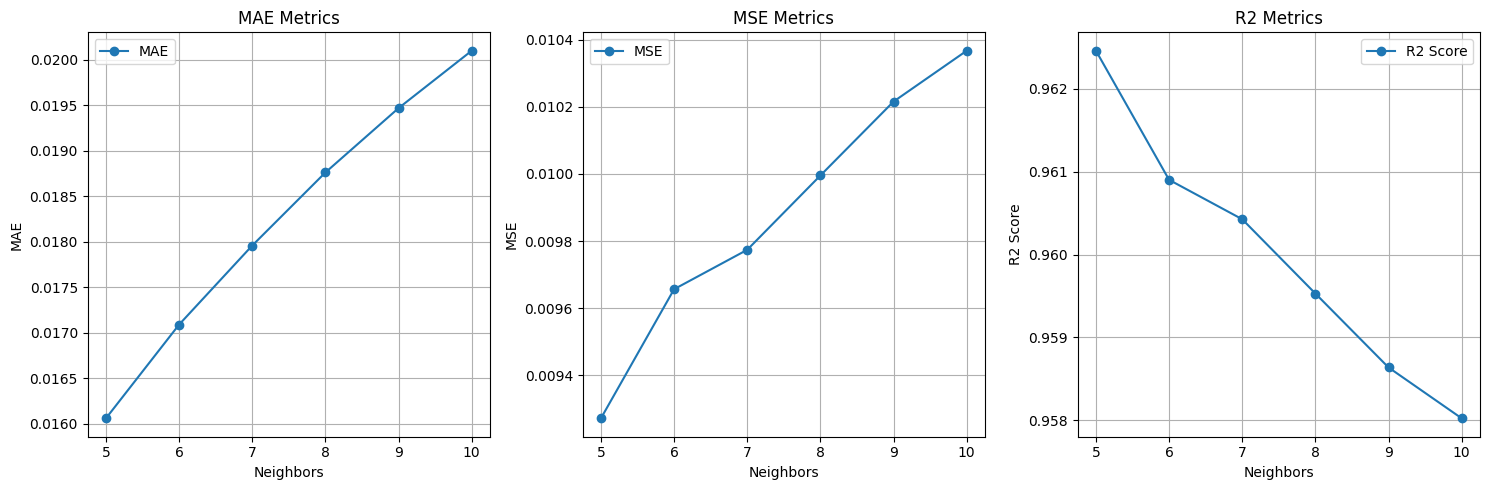

In [20]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot MAE
axes[0].plot(metrics_df['Neighbors'], metrics_df['MAE'], label='MAE', marker='o')
axes[0].set_title('MAE Metrics')
axes[0].set_xlabel('Neighbors')
axes[0].set_ylabel('MAE')
axes[0].legend()
axes[0].grid(True)

# Plot MSE
axes[1].plot(metrics_df['Neighbors'], metrics_df['MSE'], label='MSE', marker='o')
axes[1].set_title('MSE Metrics')
axes[1].set_xlabel('Neighbors')
axes[1].set_ylabel('MSE')
axes[1].legend()
axes[1].grid(True)

# Plot R2 Score
axes[2].plot(metrics_df['Neighbors'], metrics_df['R2_Score'], label='R2 Score', marker='o')
axes[2].set_title('R2 Metrics')
axes[2].set_xlabel('Neighbors')
axes[2].set_ylabel('R2 Score')
axes[2].legend()
axes[2].grid(True)

# Tampilkan grafik
plt.tight_layout()
plt.show()

Based on the graphics, from MAE, MSE and R2 score is 5 for nearest neighbors